### IMPORTING REQUIRED LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### IMPORTING THE DATASET

In [4]:
df = pd.read_csv('Data Analyst Assessment - dataset 1.csv')

### DATA AUDIT

In [5]:
df.head()

,Month,Financial Year,Chain,Suburb,State,Postcode,Country,Manager,Category,Buyer,Sales
0,1/1/2016,2015/16,Fashions Direct,Chatswood,NSW,2067,Australia,Jeremy Garcia,Home,Richard Carr,479.02
1,1/1/2016,2015/16,Fashions Direct,Chatswood,NSW,2067,Australia,Jeremy Garcia,Juniors,Chester George,149.95
2,1/1/2016,2015/16,Fashions Direct,Chatswood,NSW,2067,Australia,Jeremy Garcia,Mens,Bruce Curran,14.00
3,1/1/2016,2015/16,Fashions Direct,Chatswood,NSW,2067,Australia,Jeremy Garcia,Juniors,Chester George,12.00
4,1/1/2016,2015/16,Fashions Direct,Chatswood,NSW,2067,Australia,Jeremy Garcia,Womens,Amy Buchanan,46.94


In [6]:
df.tail()

,Month,Financial Year,Chain,Suburb,State,Postcode,Country,Manager,Category,Buyer,Sales
72420,1/7/2017,2017/18,Fashions Direct,Ballarat,VIC,3353,Australia,Jerry Fulton,Kids,Elizabeth Gentry,2335.83
72421,1/7/2017,2017/18,Fashions Direct,Ballarat,VIC,3353,Australia,Jerry Fulton,Kids,Elizabeth Gentry,3430.66
72422,1/7/2017,2017/18,Fashions Direct,Ballarat,VIC,3353,Australia,Jerry Fulton,Home,Richard Carr,4591.11
72423,1/7/2017,2017/18,Fashions Direct,Ballarat,VIC,3353,Australia,Jerry Fulton,Home,Richard Carr,3674.59
72424,1/7/2017,2017/18,Fashions Direct,Ballarat,VIC,3353,Australia,Jerry Fulton,Juniors,Chester George,3219.74


In [7]:
df.shape

(72425, 11)

In [8]:
df.columns

Index(['Month', 'Financial Year', 'Chain', 'Suburb', 'State', 'Postcode',
       'Country', 'Manager', 'Category', 'Buyer', 'Sales'],
      dtype='object')

In [9]:
#No null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72425 entries, 0 to 72424
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Month           72425 non-null  object 
 1   Financial Year  72425 non-null  object 
 2   Chain           72425 non-null  object 
 3   Suburb          72425 non-null  object 
 4   State           72425 non-null  object 
 5   Postcode        72425 non-null  int64  
 6   Country         72425 non-null  object 
 7   Manager         72425 non-null  object 
 8   Category        72425 non-null  object 
 9   Buyer           72425 non-null  object 
 10  Sales           72425 non-null  float64
dtypes: float64(1), int64(1), object(9)
memory usage: 6.1+ MB


In [10]:
df.nunique()
#Every suburb has there unique postcode

,0
Month,19
Financial Year,3
Chain,2
Suburb,97
State,8
Postcode,97
Country,1
Manager,21
Category,10
Buyer,10


In [11]:
df['Chain'].value_counts()

,count
Chain,
Fashions Direct,37190
Next Look,35235


In [12]:
df['Financial Year'].value_counts()

,count
Financial Year,
2016/17,45541
2015/16,22407
2017/18,4477


In [13]:
df['State'].value_counts()

,count
State,
NSW,21655
VIC,16888
QLD,15427
WA,8327
SA,4653
TAS,2398
NT,1608
ACT,1469


In [14]:
#Seems like every Category has a unique buyer
df[df['Category']=='Juniors']['Buyer'].unique()

array(['Chester George'], dtype=object)

In [15]:
#Every category has a unique buyer
l = []
for x in df.Category.unique():
    l.append(df[df['Category']==x]['Buyer'].nunique())

print(l)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [16]:
df.Category.unique()

array(['Home', 'Juniors', 'Mens', 'Womens', 'Kids', 'Accessories',
       'Hosiery', 'Intimate', 'Groceries', 'Shoes'], dtype=object)

In [17]:
#Every Manager selling every category
df[df['Category']=='Juniors']['Manager'].nunique()

21

In [18]:
#Category being sold in all eight states
df[df['Category']=='Juniors']['State'].nunique()

8

### SALES DATA

In [19]:
df.Sales.describe()

,Sales
count,72425.000000
mean,752.251110
std,1227.499901
min,-119.940000
25%,41.370000
50%,223.450000
75%,913.690000
max,18761.580000


In [20]:
print('Mean :',df['Sales'].mean())
print('Medain :',df['Sales'].median())
print('Mode :',df['Sales'].mode())

Mean : 752.2511103900587
Medain : 223.45
Mode : 0    1.0
Name: Sales, dtype: float64


In [21]:
#Mean significantly higher then median i.e. most of the sales are around 223$ with some outliers.

<Axes: xlabel='Sales'>

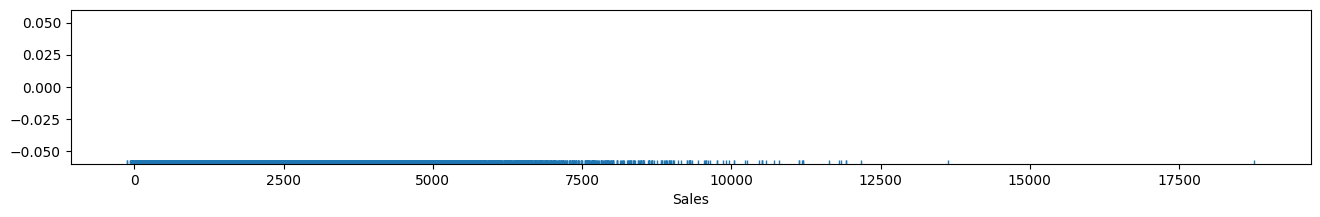

In [22]:
plt.figure(figsize=(16,2))
sns.rugplot(df['Sales'])

<Axes: xlabel='Sales', ylabel='Density'>

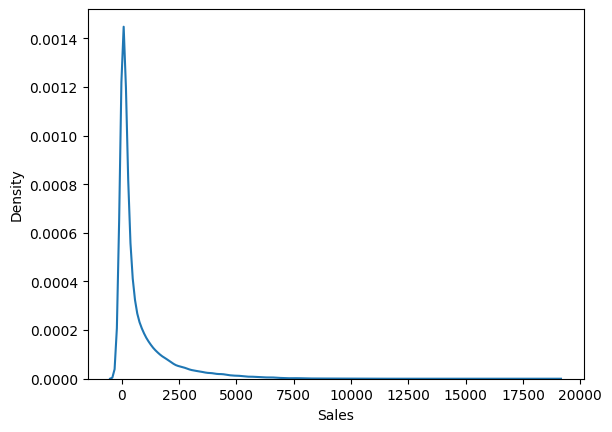

In [23]:
sns.kdeplot(df['Sales'])

/tmp/ipython-input-24-3789482492.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Sales'],bins = 60)


<Axes: xlabel='Sales', ylabel='Density'>

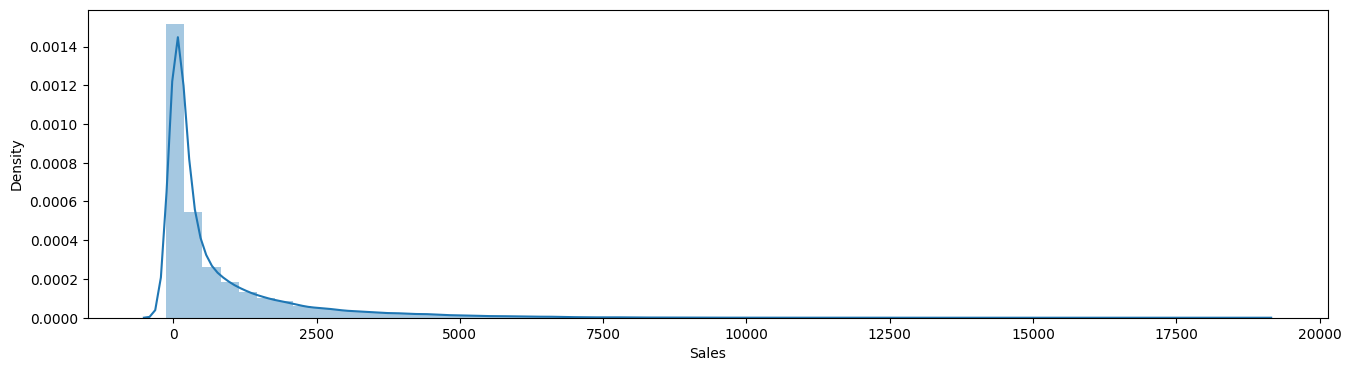

In [24]:
plt.figure(figsize=(16,4))
sns.distplot(df['Sales'],bins = 60)

In [25]:
#Less than 1 percent sales are more than 6000$
df[df['Sales']>6000].count()

,0
Month,629
Financial Year,629
Chain,629
Suburb,629
State,629
Postcode,629
Country,629
Manager,629
Category,629
Buyer,629


In [26]:
#Sales Data is basically following right skewed trend

### Month - Sales

/tmp/ipython-input-63-3373623794.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


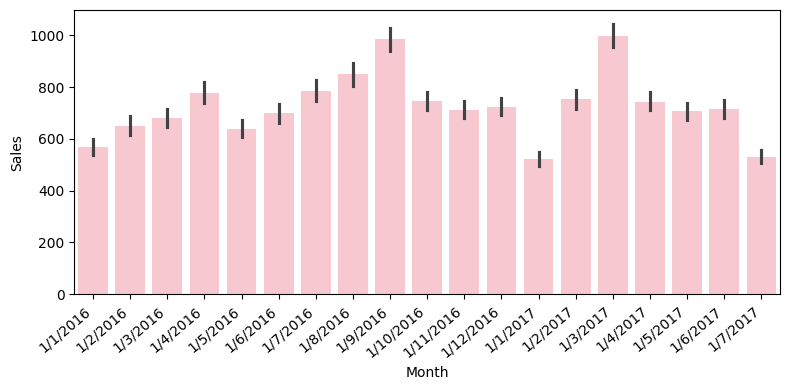

In [63]:
#There is no obvious trend in month Data
plt.figure(figsize=(8,4))
ax = sns.barplot(x='Month',y='Sales',data=df,color='pink')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [28]:
pd.pivot_table(df,values='Sales',index='Month',aggfunc=np.sum)

/tmp/ipython-input-28-661748141.py:1: FutureWarning: The provided callable <function sum at 0x7e19695c1260> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pd.pivot_table(df,values='Sales',index='Month',aggfunc=np.sum)


,Sales
Month,
1/1/2016,2141097.07
1/1/2017,1982576.24
1/10/2016,2645629.67
1/11/2016,2834709.65
1/12/2016,3223934.43
1/2/2016,2461340.57
1/2/2017,2751983.29
1/3/2016,2725084.27
1/3/2017,3849737.18


/tmp/ipython-input-73-2458959812.py:2: FutureWarning: The provided callable <function sum at 0x7e19695c1260> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  Month_Sales = pd.pivot_table(df,values='Sales',index='Month',aggfunc=np.sum)
/tmp/ipython-input-73-2458959812.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="center")


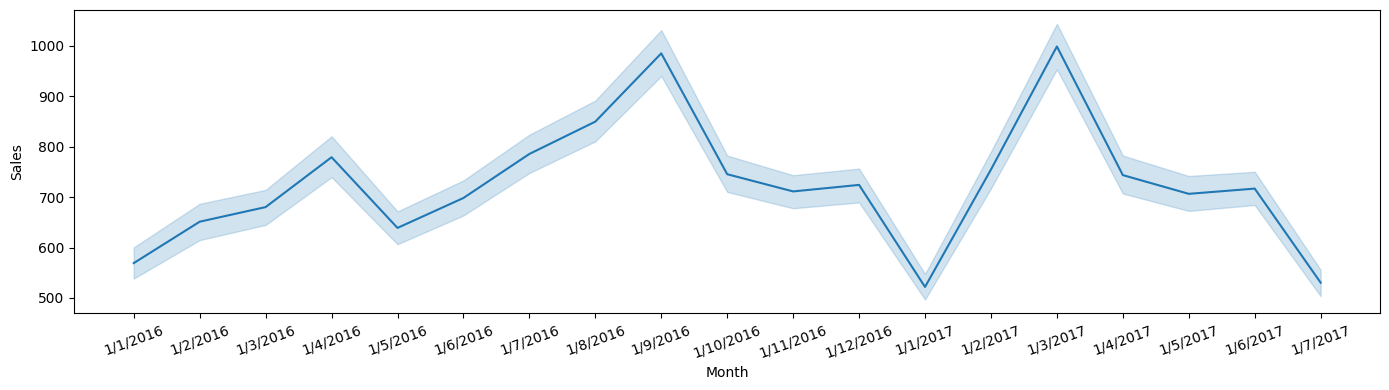

In [73]:
#Sum of sales month wise
Month_Sales = pd.pivot_table(df,values='Sales',index='Month',aggfunc=np.sum)
plt.figure(figsize=(14,4))
ax = sns.lineplot(x = 'Month',y = 'Sales',data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="center")
plt.tight_layout()
plt.show()

### Financial Year - Sales

/tmp/ipython-input-71-152549405.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center")


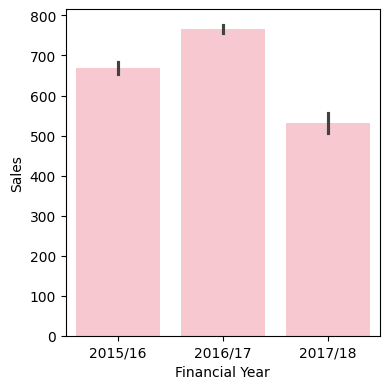

In [71]:
#
plt.figure(figsize=(4,4))
ax = sns.barplot(x='Financial Year',y='Sales',data=df,color='pink')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center")
plt.tight_layout()
plt.show()

### Chain-Sales

/tmp/ipython-input-74-4163421215.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center")


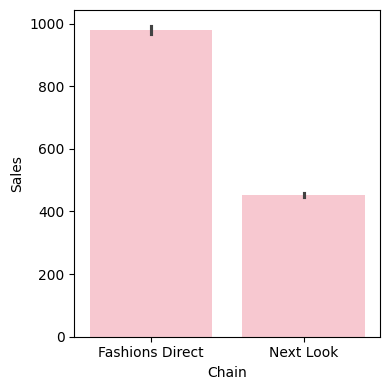

In [74]:
plt.figure(figsize=(4,4))
ax = sns.barplot(x='Chain',y='Sales',data=df,color="pink")
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center")
plt.tight_layout()
plt.show()

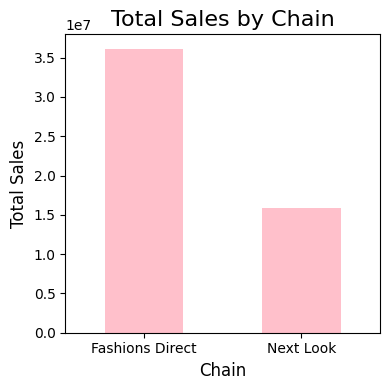

In [85]:
#Total Sales by chain
df.groupby(['Chain'])['Sales'].sum().plot(kind='bar',
    figsize=(4, 4),
    color='pink'
)
# Add titles and labels for a more complete plot
plt.title('Total Sales by Chain', fontsize=16)
plt.xlabel('Chain', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=0) # Keep the x-axis labels horizontal
plt.tight_layout() # Adjust plot to ensure everything fits without overlapping
plt.show()

### Category-Sales

In [86]:
df.groupby(['Category'])['Sales'].mean()

,Sales
Category,
Accessories,485.697147
Groceries,756.757692
Home,1037.978931
Hosiery,381.717484
Intimate,453.683955
Juniors,755.484542
Kids,615.302861
Mens,999.485685
Shoes,1152.610790


In [87]:
df.groupby(['Category'])['Sales'].count()

,Sales
Category,
Accessories,6799
Groceries,2704
Home,6726
Hosiery,3275
Intimate,4920
Juniors,9464
Kids,9609
Mens,9898
Shoes,7304


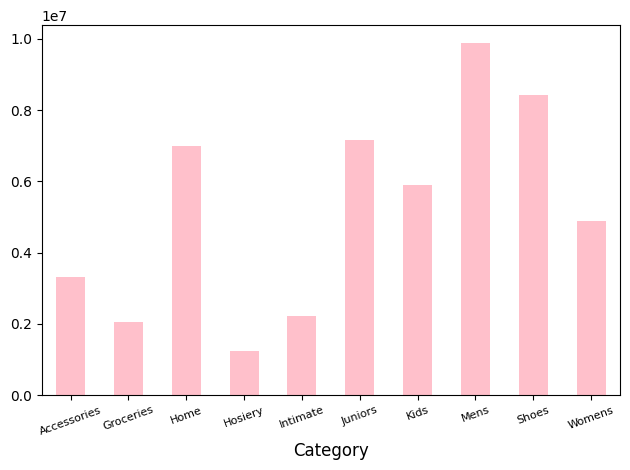

In [93]:
df.groupby(['Category'])['Sales'].sum().plot(kind = 'bar',color='pink')
# Add titles and labels for a more complete plot

plt.xlabel('Category', fontsize=12)

plt.xticks(rotation=20,fontsize=8) # Keep the x-axis labels horizontal
plt.tight_layout() # Adjust plot to ensure everything fits without overlapping
plt.show()

/tmp/ipython-input-99-706275551.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center",fontsize=8)


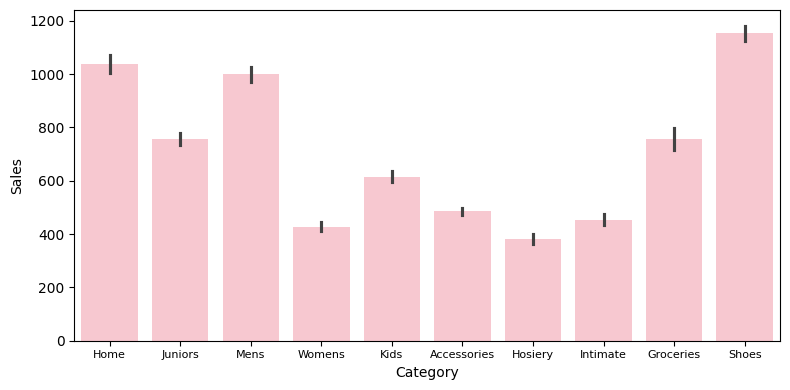

In [99]:
plt.figure(figsize=(8,4))
ax = sns.barplot(x='Category',y='Sales',data=df,color='pink')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center",fontsize=8)
plt.tight_layout()
plt.show()

### Manager-Sales

/tmp/ipython-input-108-2048601799.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="center",fontsize=6)


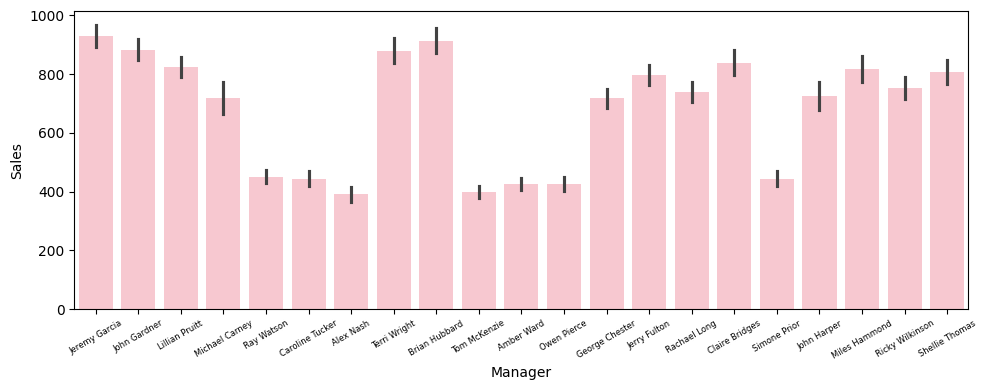

In [108]:
plt.figure(figsize=(10,4))
ax = sns.barplot(x='Manager',y='Sales',data=df,color='pink')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="center",fontsize=6)
plt.tight_layout()
plt.show()

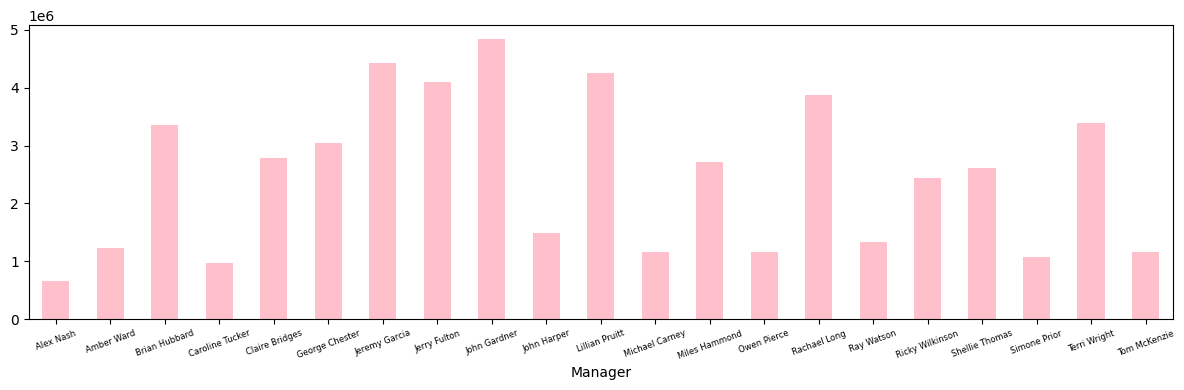

In [119]:
df.groupby(['Manager'])['Sales'].sum().plot(kind = 'bar',figsize=(12,4),color='pink')
# Add titles and labels for a more complete plot

plt.xticks(rotation=20,ha='center',fontsize=6) # Keep the x-axis labels horizontal
plt.tight_layout() # Adjust plot to ensure everything fits without overlapping
plt.show()

### Sata-Sales

/tmp/ipython-input-122-3379009191.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center")


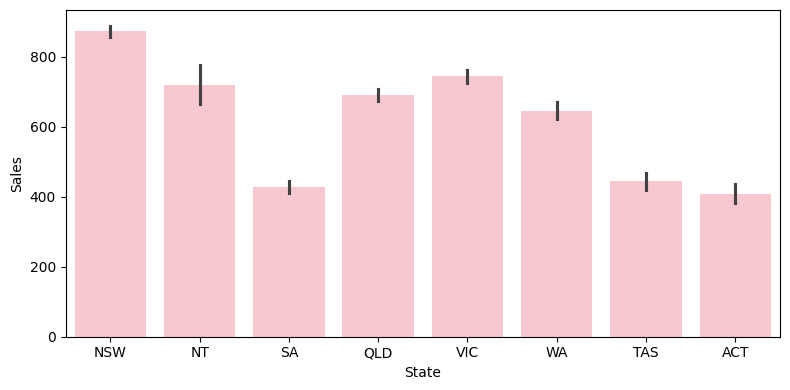

In [122]:
plt.figure(figsize=(8,4))
ax = sns.barplot(x='State',y='Sales',data=df,color='pink')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center")
plt.tight_layout()
plt.show()

In [123]:
df.columns

Index(['Month', 'Financial Year', 'Chain', 'Suburb', 'State', 'Postcode',
       'Country', 'Manager', 'Category', 'Buyer', 'Sales'],
      dtype='object')

### Linera Regression

In [124]:
#Removing the outliers
from scipy import stats
df = df[(np.abs(stats.zscore(df['Sales'])) < 5)]

In [125]:
X = df.drop(['Postcode','Country','Buyer','Sales','State','Financial Year'],axis='columns')

In [126]:
X.head()

,Month,Chain,Suburb,Manager,Category
0,1/1/2016,Fashions Direct,Chatswood,Jeremy Garcia,Home
1,1/1/2016,Fashions Direct,Chatswood,Jeremy Garcia,Juniors
2,1/1/2016,Fashions Direct,Chatswood,Jeremy Garcia,Mens
3,1/1/2016,Fashions Direct,Chatswood,Jeremy Garcia,Juniors
4,1/1/2016,Fashions Direct,Chatswood,Jeremy Garcia,Womens


In [127]:
y = df.Sales

In [128]:
y.head()

,Sales
0,479.02
1,149.95
2,14.00
3,12.00
4,46.94


In [129]:
X = pd.get_dummies(X,drop_first=True)

In [130]:
X.head()

,Month_1/1/2017,Month_1/10/2016,Month_1/11/2016,Month_1/12/2016,Month_1/2/2016,Month_1/2/2017,Month_1/3/2016,Month_1/3/2017,Month_1/4/2016,Month_1/4/2017,...,Manager_Tom McKenzie,Category_Groceries,Category_Home,Category_Hosiery,Category_Intimate,Category_Juniors,Category_Kids,Category_Mens,Category_Shoes,Category_Womens
0,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [131]:
from sklearn.model_selection import train_test_split

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [133]:
from sklearn.linear_model import LinearRegression

In [134]:
lm = LinearRegression()

In [135]:
lm.fit(X_train,y_train)

LinearRegression()

In [136]:
print(lm.intercept_)

600.8382333473595


In [137]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Month_1/1/2017,-65.420861
Month_1/10/2016,136.371948
Month_1/11/2016,96.117931
Month_1/12/2016,113.536997
Month_1/2/2016,51.247775
...,...
Category_Juniors,262.558112
Category_Kids,61.327933
Category_Mens,510.873230
Category_Shoes,672.985600


In [138]:
predictions = lm.predict(X_test)

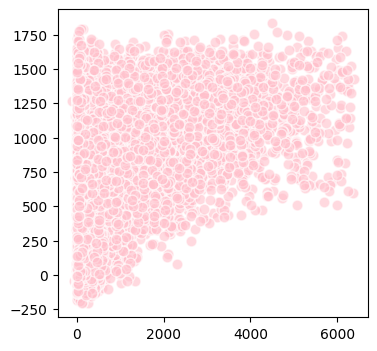

In [146]:

plt.figure(figsize=(4, 4))

# 2. Change Color, Size, and Style of the points
plt.scatter(y_test, predictions,
            color='pink',        # Change the color of the points
            s=60,                # Change the size of the points
            alpha=0.6,           # Make points slightly transparent to see overlaps
            edgecolors='white',
            marker='o'           # Use circles as markers (this is the default)
           )

/tmp/ipython-input-141-1326397652.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions),bins=50);


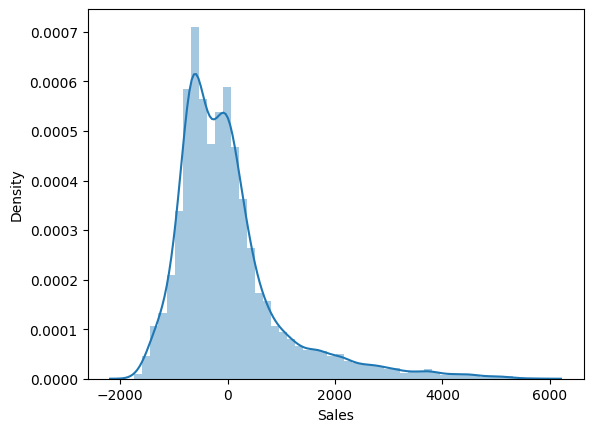

In [141]:
sns.distplot((y_test-predictions),bins=50);

In [58]:
from sklearn import metrics

In [59]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 730.2402307591542
MSE: 1098356.3443197715
RMSE: 1048.024973137459


In [60]:
df.columns

Index(['Month', 'Financial Year', 'Chain', 'Suburb', 'State', 'Postcode',
       'Country', 'Manager', 'Category', 'Buyer', 'Sales'],
      dtype='object')

In [61]:
pd.pivot_table(df,values='Sales',index='Category',aggfunc=np.sum).sort_values(['Sales'],ascending=False)

/tmp/ipython-input-61-1030917864.py:1: FutureWarning: The provided callable <function sum at 0x7e19695c1260> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pd.pivot_table(df,values='Sales',index='Category',aggfunc=np.sum).sort_values(['Sales'],ascending=False)


,Sales
Category,
Mens,9892909.31
Shoes,8418669.21
Juniors,7149905.71
Home,6981446.29
Kids,5912445.19
Womens,4882080.04
Accessories,3302254.90
Intimate,2232125.06
Groceries,2046272.80
